## Question: Which Vancouver sports team should you cheer for? 🏒

It's no secret that most of us reading this are bandwagoners - but fear not! If we are going to embrace bandwagoning, we should obviously turn our attention to the team that has the best win percentage. In Vancouver, there are six professional sports teams that battle at the highest level amongst their respective leagues. These leagues range from football to soccer to baseball and even to gaming. The question is: **Which professional sports team in Vancouver has the best win percentage throughout the years? Which team should I cheer for year-to-year that gives me the best chance to do my victory dance?**

Professional Sports Teams in Vancouver:
* BC Lions (American Football)
* Vancouver Canadians (Baseball)
* Vancouver Canucks (Ice Hockey)
* Vancouver Titans (Overwatch/Gaming)
* Vancouver Warriors (Lacrosse)
* Vancouver Whitecaps (Soccer)

In [475]:
# invite the party people!
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup

# invite the artists
import matplotlib.pyplot as plt

In [80]:
# write a helper function to assist in transforming wiki tables into dataframes
def get_df(url,pos):
    res = requests.get(url)
    soup = BeautifulSoup(res.content,'lxml')
    table = soup.find_all('table')[pos] 
    df = pd.read_html(str(table))[0]
    return df

In [201]:
# Let's start with the BC Lions
df_lions = get_df('https://en.wikipedia.org/wiki/List_of_BC_Lions_seasons',1)
# lets clean this up a bit and extract only the relevant information
df_lions = df_lions.iloc[0:64]
# filter out for the columns we want (win/loss)
df_lions_col = ['Leagueseason', 'Wins', 'Losses']
df_lions = df_lions[df_lions_col]
# calculate the win percentage for ever year as an additional column
df_lions['Win Percentage'] = (df_lions['Wins'] / (df_lions['Wins'] + df_lions['Losses']))*100
# rename Leagueseason to season
df_lions.rename(columns={"Leagueseason": "Season"},inplace=True)
# convert entire dataframe to numbers
df_lions = df_lions.apply(pd.to_numeric)
#df_lions.info()
df_lions.head()

,Season,Wins,Losses,Win Percentage
0,1954,1,15,6.250000
1,1955,5,11,31.250000
2,1956,6,10,37.500000
3,1957,4,11,26.666667
4,1958,3,13,18.750000


In [511]:
df_lions.describe()

,Season,Wins,Losses,Win Percentage
count,64.000000,64.000000,64.000000,64.000000
mean,1985.500000,8.281250,8.343750,49.427146
std,18.618987,3.234088,2.885204,18.435072
min,1954.000000,1.000000,2.000000,6.250000
25%,1969.750000,6.000000,6.000000,37.053571
50%,1985.500000,8.000000,8.500000,50.000000
75%,2001.250000,11.000000,10.250000,62.500000
max,2017.000000,14.000000,15.000000,84.615385


The BC Lions have an average win percentage of 49.42%.<br>
The BC Lions' lowest win percentage was 6.25% in 1954 (their first year).<br>
The BC Lions' highest win percentage was 84.61% in 1964.<br>

Text(0, 0.5, 'Win Percentage (%)')

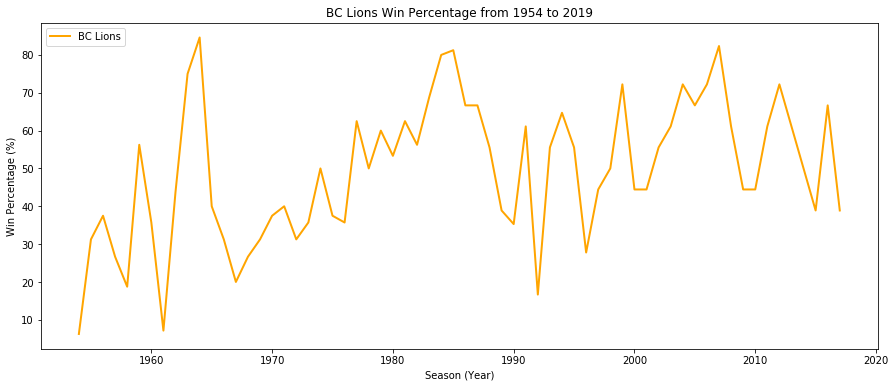

In [502]:
plt.figure(figsize=(15,6))
plt.plot(df_lions['Season'],df_lions['Win Percentage'], color='orange', label='BC Lions', linewidth=2)
plt.legend(loc=2)
plt.title('BC Lions Win Percentage from 1954 to 2019')
plt.xlabel('Season (Year)')
plt.ylabel('Win Percentage (%)')

In [497]:
# Vancouver Canadians is the only table that does not exist in Wikipedia. Table scraping should be similar though.
df_canadians = get_df('https://www.baseball-reference.com/bullpen/Vancouver_Canadians',0)
# Filter for relevant columns and drop 2019 with no data
df_canadians = df_canadians[['Year', 'Record']][:-1]
# Split the Record column into Wins and Losses
df_canadians[['Wins','Losses']] = df_canadians['Record'].str.split('-',expand=True) 
# Drop the Record column
df_canadians.drop(['Record'],inplace=True,axis=1)
# Convert everything to a number
df_canadians["Wins"] = df_canadians["Wins"].astype(int)
df_canadians["Losses"] = df_canadians["Losses"].astype(int)
# Calculate the win percentage
df_canadians['Win Percentage'] = ( df_canadians['Wins'] / (df_canadians['Wins'] + df_canadians['Losses']) )*100
# Rename Year to Season
df_canadians.rename(columns={"Year": "Season"},inplace=True)
#df_canadians.info()
df_canadians.head()

,Season,Wins,Losses,Win Percentage
0,1978,74,65,53.237410
1,1979,79,68,53.741497
2,1980,79,60,56.834532
3,1981,56,76,42.424242
4,1982,72,72,50.000000


In [512]:
df_canadians.describe()

,Season,Wins,Losses,Win Percentage
count,41.000000,41.000000,41.000000,41.000000
mean,1998.000000,56.829268,53.682927,51.307211
std,11.979149,18.995924,17.341336,6.221258
min,1978.000000,29.000000,30.000000,36.296296
25%,1988.000000,39.000000,37.000000,48.684211
50%,1998.000000,53.000000,57.000000,51.315789
75%,2008.000000,74.000000,68.000000,55.263158
max,2018.000000,85.000000,90.000000,61.594203


The Vancouver Canadians have an average win percentage of 51.30%.<br>
The Vancouver Canadians' lowest win percentage was 36.30% in 1991.<br>
The Vancouver Canadians' highest win percentage was 61.59% in 1986.<br>

Text(0, 0.5, 'Win Percentage (%)')

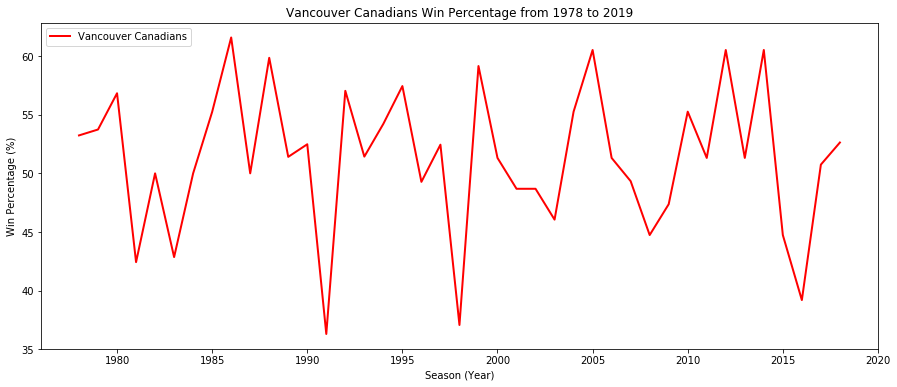

In [506]:
plt.figure(figsize=(15,6))
plt.plot(df_canadians['Season'],df_canadians['Win Percentage'], color='red', label='Vancouver Canadians', linewidth=2)
plt.legend(loc=2)
plt.title('Vancouver Canadians Win Percentage from 1978 to 2019')
plt.xlabel('Season (Year)')
plt.ylabel('Win Percentage (%)')

In [202]:
# Do the same for the Canucks
df_canucks = get_df('https://en.wikipedia.org/wiki/List_of_Vancouver_Canucks_seasons',2)
# Clean up and filter the multi-index
df_canucks.columns = [' '.join(set(col)).strip() for col in df_canucks.columns.values]
df_canucks = df_canucks[['NHL season','W Regular-season', 'L Regular-season','W Postseason', 'L Postseason']]
# remove the year of the NHL Lockout
df_canucks.drop(df.index[34],inplace=True)
# convert undefined values in Postseason to 0
df_canucks['W Postseason'].replace('—', 0,inplace=True)
df_canucks['L Postseason'].replace('—', 0,inplace=True)
# remove non-digit values in Regular season
df_canucks['W Regular-season'] = df_canucks['W Regular-season'].str.extract('(\d+)', expand=False)
df_canucks['L Regular-season'] = df_canucks['L Regular-season'].str.extract('(\d+)', expand=False)
df_canucks['NHL season'] = df_canucks['NHL season'].str.extract('(\d+)', expand=False)
# convert entire dataframe to numbers
df_canucks = df_canucks.apply(pd.to_numeric)
# combine regular season and post seasons wins and losses
df_canucks['Wins'] = df_canucks['W Regular-season'] + df_canucks['W Postseason']
df_canucks['Losses'] = df_canucks['L Regular-season'] + df_canucks['L Postseason']
# calculate the win percentage for ever year as an additional column
df_canucks['Win Percentage'] = ( df_canucks['Wins'] / (df_canucks['Wins'] + df_canucks['Losses']) )*100
# rename NHL season to season
df_canucks.rename(columns={"NHL season": "Season"},inplace=True)
# only keep relevant columns
df_canucks = df_canucks[['Season','Wins','Losses','Win Percentage']]
#df_canucks.info()
df_canucks.head()

,Season,Wins,Losses,Win Percentage
0,1970,24,46,34.285714
1,1971,20,50,28.571429
2,1972,22,47,31.884058
3,1973,24,43,35.820896
4,1974,39,36,52.000000


In [513]:
df_canucks.describe()

,Season,Wins,Losses,Win Percentage
count,48.000000,48.000000,48.000000,48.000000
mean,1993.791667,35.229167,37.875000,47.486635
std,14.364493,11.706044,7.033733,10.775762
min,1970.000000,20.000000,19.000000,28.571429
25%,1981.750000,25.000000,33.000000,37.737449
50%,1993.500000,32.000000,38.500000,46.621005
75%,2006.250000,42.500000,43.000000,56.496881
max,2018.000000,69.000000,50.000000,70.408163


The Vancouver Canucks have an average win percentage of 47.49%.<br>
The Vancouver Canucks' lowest win percentage was 28.57% in 1971.<br>
The Vancouver Canucks' highest win percentage was 70.41% in 2010.<br>

Text(0, 0.5, 'Win Percentage (%)')

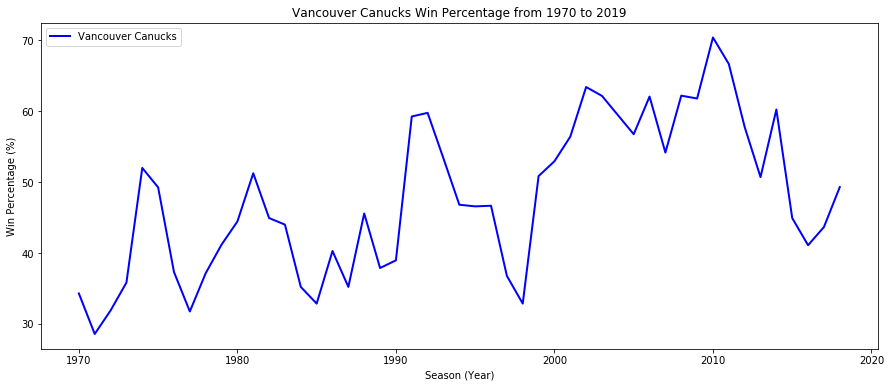

In [531]:
# plot win percentages over the years for the Vancouver Canucks
plt.figure(figsize=(15,6))
plt.plot(df_canucks['Season'],df_canucks['Win Percentage'], color='blue', label='Vancouver Canucks', linewidth=2)
plt.legend(loc=2)
plt.title('Vancouver Canucks Win Percentage from 1970 to 2019')
plt.xlabel('Season (Year)')
plt.ylabel('Win Percentage (%)')

In [461]:
# Lets create the dataframe for the Vancouver Titans
df_titans = get_df('https://en.wikipedia.org/wiki/2019_Vancouver_Titans_season',3)
# The Vancouver titans have only been playing for a single year, hence their table is spread across the games that occured in 2019
# First, let's extract out the 'Overall' row for the relevant data of the single year of play in 2019
df_titans = df_titans.iloc[5]
# Let's add a season column
df_titans['Season'] = 2019
# only keeping the relevant columns
df_titans = df_titans[['Season','W','L']]
# convert all columns to correct types
df_titans['Season'] = int(df_titans['Season'])
df_titans['W'] = int(df_titans['W'])
df_titans['L'] = int(df_titans['L'])
# Calculate the win percentage
df_titans['Win Percentage'] = ( df_titans['W'] / (df_titans['W'] + df_titans['L']) )*100
# Rename to correct column names
df_titans.rename({'W':'Wins','L':'Losses'},inplace=True)
df_titans.head()

Season               2019
Wins                   24
Losses                  3
Win Percentage    88.8889
Name: 5, dtype: object

In [514]:
df_titans.describe()

count      4.000000
unique     4.000000
top       88.888889
freq       1.000000
Name: 5, dtype: float64

In [ ]:
df_canucks[df_canucks['Win Percentage'] == df_canucks['Win Percentage'].min()]

Note: The Vancouver Titans have only had one season of professional play.<br>
The Vancouver Titans have an average win percentage of 88.89%.<br>
The Vancouver Titans' lowest win percentage was 88.89% in 2019.<br>
The Vancouver Titans' highest win percentage was 88.89% in 2019.<br>

Text(0, 0.5, 'Win Percentage (%)')

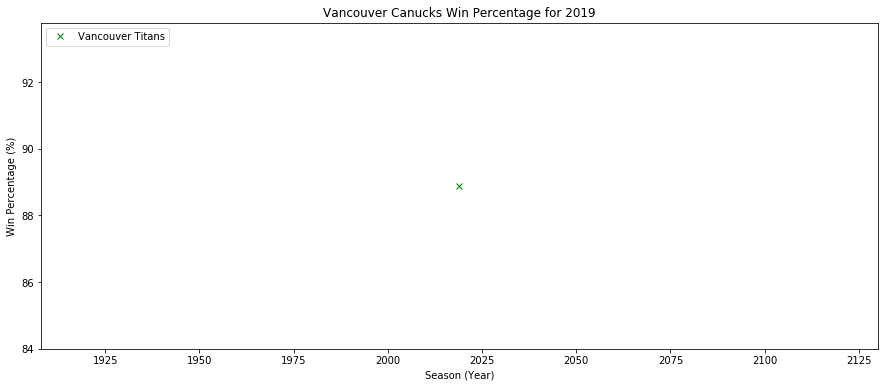

In [508]:
plt.figure(figsize=(15,6))
plt.plot(df_titans['Season'],df_titans['Win Percentage'], 'gx', label='Vancouver Titans', linewidth=2)
plt.legend(loc=2)
plt.title('Vancouver Canucks Win Percentage for 2019')
plt.xlabel('Season (Year)')
plt.ylabel('Win Percentage (%)')

In [325]:
# Vancouver Warriors dataframe, let's go!
df_warriors = get_df('https://en.wikipedia.org/wiki/Vancouver_Warriors',2)
# This dataframe is interesting because its Win-Loss is in one column, we will need to parse this
# Let's get the relevant columns and remove the "Total" rows
df_warriors = df_warriors[['Season','W–L']][:5]
# Split the W-L column into Wins and Losses
df_warriors[['Wins','Losses']] = df_warriors['W–L'].str.split('–',expand=True) 
# Drop the W-L column
df_warriors.drop(['W–L'],inplace=True,axis=1)
# Convert everything to a number
df_warriors = df_warriors.apply(pd.to_numeric)
# Calculate the win percentage
df_warriors['Win Percentage'] = ( df_warriors['Wins'] / (df_warriors['Wins'] + df_warriors['Losses']) )*100
df_warriors.head()

,Season,Wins,Losses,Win Percentage
0,2014,4,14,22.222222
1,2015,5,13,27.777778
2,2016,5,13,27.777778
3,2017,9,9,50.000000
4,2018,2,16,11.111111


In [515]:
df_warriors.describe()

,Season,Wins,Losses,Win Percentage
count,5.000000,5.00000,5.00000,5.000000
mean,2016.000000,5.00000,13.00000,27.777778
std,1.581139,2.54951,2.54951,14.163943
min,2014.000000,2.00000,9.00000,11.111111
25%,2015.000000,4.00000,13.00000,22.222222
50%,2016.000000,5.00000,13.00000,27.777778
75%,2017.000000,5.00000,14.00000,27.777778
max,2018.000000,9.00000,16.00000,50.000000


The Vancouver Warriors have an average win percentage of 27.78% <br>
The Vancouver Warriors' lowest win percentage was 50.00% in 2017.<br>
The Vancouver Warriors' highest win percentage was 11.11% in 2018.<br>

Text(0, 0.5, 'Win Percentage (%)')

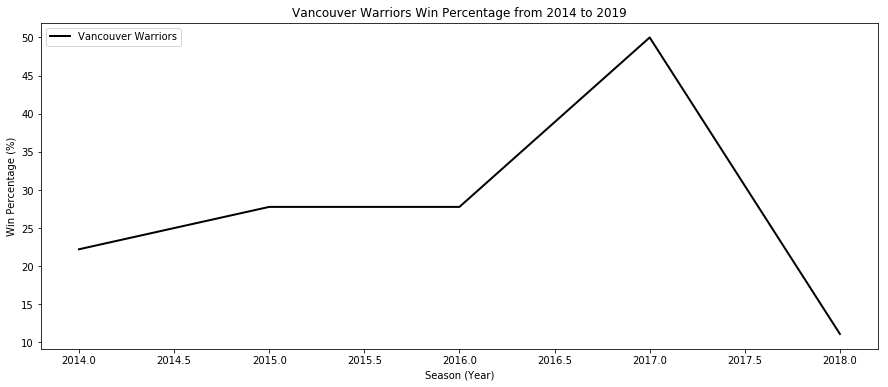

In [509]:
plt.figure(figsize=(15,6))
plt.plot(df_warriors['Season'],df_warriors['Win Percentage'], color='black', label='Vancouver Warriors', linewidth=2)
plt.legend(loc=2)
plt.title('Vancouver Warriors Win Percentage from 2014 to 2019')
plt.xlabel('Season (Year)')
plt.ylabel('Win Percentage (%)')

In [416]:
# Okay, let's get the last dataframe. Vancouver Whitecaps FC!
df_whitecaps = get_df('https://en.wikipedia.org/wiki/List_of_Vancouver_Whitecaps_FC_seasons',2)
# Clean up and filter the multi-index
df_whitecaps.columns = [' '.join(set(col)).strip() for col in df_whitecaps.columns.values]
# Since we are strictly looking at win rate, we can take the ratio of wins over number of games played
df_whitecaps = df_whitecaps[['Year','W MLS Regular season','L MLS Regular season', 'MLS Regular season D']]
# Rename to correct column names
df_whitecaps.columns = ['Season', 'Wins', 'Losses', 'Draws']
df_whitecaps['Win Percentage'] = ( df_whitecaps['Wins'] / (df_whitecaps['Wins'] + df_whitecaps['Losses'] + df_whitecaps['Draws']))*100
#df_whitecaps.info()
df_whitecaps.head()

,Season,Wins,Losses,Draws,Win Percentage
0,2011,6,18,10,17.647059
1,2012,11,13,10,32.352941
2,2013,13,12,9,38.235294
3,2014,12,8,14,35.294118
4,2015,16,13,5,47.058824


In [516]:
df_whitecaps.describe()

,Season,Wins,Losses,Draws,Win Percentage
count,8.00000,8.000000,8.000000,8.000000,8.000000
mean,2014.50000,12.000000,13.000000,9.000000,35.294118
std,2.44949,3.116775,2.828427,2.618615,9.166985
min,2011.00000,6.000000,8.000000,5.000000,17.647059
25%,2012.75000,10.750000,12.000000,7.750000,31.617647
50%,2014.50000,12.500000,13.000000,9.000000,36.764706
75%,2016.25000,13.500000,13.500000,10.000000,39.705882
max,2018.00000,16.000000,18.000000,14.000000,47.058824


The Vancouver Whitecaps FC have an average win percentage of 35.29% <br>
The Vancouver Whitecaps FC's lowest win percentage was 17.65% in 2011.<br>
The Vancouver Whitecaps FC's highest win percentage was 47.06% in 2015.<br>

Text(0, 0.5, 'Win Percentage (%)')

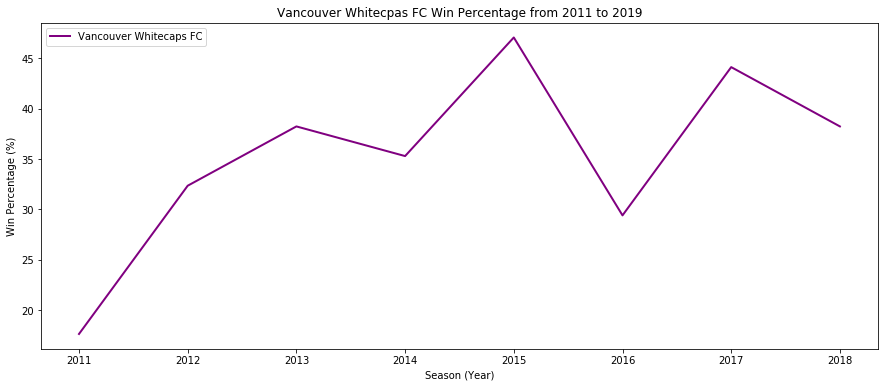

In [510]:
plt.figure(figsize=(15,6))
plt.plot(df_whitecaps['Season'],df_whitecaps['Win Percentage'], color='purple', label='Vancouver Whitecaps FC', linewidth=2)
plt.legend(loc=2)
plt.title('Vancouver Whitecpas FC Win Percentage from 2011 to 2019')
plt.xlabel('Season (Year)')
plt.ylabel('Win Percentage (%)')

We will overlay all the win percentage graphs of each respective team into one figure. This will let us know the win trends between each team. 

Text(0, 0.5, 'Win Percentage (%)')

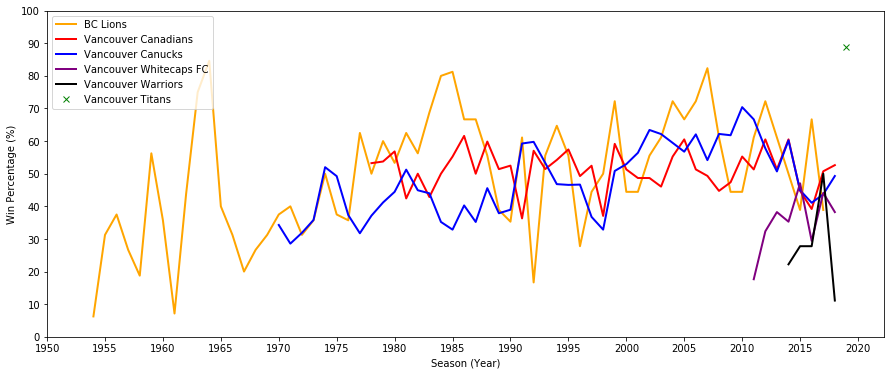

In [540]:
# overlay all the win percentage figures of each team
plt.figure(figsize=(15,6))

plt.plot(df_lions['Season'],df_lions['Win Percentage'], color='orange', label='BC Lions', linewidth=2)
plt.plot(df_canadians['Season'],df_canadians['Win Percentage'], color='red', label='Vancouver Canadians',linewidth=2)
plt.plot(df_canucks['Season'],df_canucks['Win Percentage'], color='blue', label='Vancouver Canucks', linewidth=2)

plt.plot(df_whitecaps['Season'],df_whitecaps['Win Percentage'], color='purple', label='Vancouver Whitecaps FC', linewidth=2)
plt.plot(df_warriors['Season'],df_warriors['Win Percentage'], color='black', label='Vancouver Warriors', linewidth=2)
plt.plot(df_titans['Season'],df_titans['Win Percentage'], 'gx', label='Vancouver Titans', linewidth=2)

plt.xticks(np.arange(1950, 2025, 5))
plt.yticks(np.arange(0, 105, 10))
plt.legend(loc=2)

plt.xlabel('Season (Year)')
plt.ylabel('Win Percentage (%)')


After analysing the win percentages throughout the years, the win percentage trend (at least for the older teams like the BC Lions) seems to come in waves. There is no clear indication of any steady growth or decline that hast lasted for the longevity of each team. Based on the graph overlay above I can make a few suggestions on which team to look towards for the highest chance of a victory dance:
* The Vancouver Titans seem to be incredible strong in their respective gaming league. Despite it being their first season, **the Vancouver Titans rank the highest in term of win percentage** amongst all the other professional Vancouver sports teams. If you enjoy gaming (particularly Overwatch), please cheer and watch the Vancouver Titans in the Overwatch League! 🎮
* The team with **the lowest average win percentage is the Vancouver Warriors at 27.78%**. Knowing that this team is young and has not been showing the best results, please refrain from bandwagoning Vancouver's Lacrosse team. 🥍
* The team with the highest average win percentage is the Vancouver Titans. But since they only have played one season, it is not a reliable representation of answer our research question of the highest win percentage "throughout the years". Disregarding the Vancouver Titans, the **next highest win percentage belongs to the Vancouver Canadians at 51.30%**! In terms of popularity, the Vancouver Canadians are in a minor league and has a smaller audience. The BC Lions and Vancouver Canucks are a percentage shy of 50% in terms of win percentage, which is still amendable for a bandwagon investment given their larger following. ⚾